In [1]:
!pip install Pillow
!pip install rasterio
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 12.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 5.9 MB/s eta 0:00:00


In [59]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import tensorflow as tf
import cv2
import os,re
import rasterio
from random import randint
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show, show_hist
from keras.layers import Input
from sklearn.model_selection import train_test_split
import sys,traceback

Mounted at /content/drive


In [109]:
tifpath = "/content/drive/My Drive/dataset/images/"
bmppath = "/content/drive/My Drive/dataset/mask/"
bmpfol = []
tiffol=[]
for image in os.listdir(tifpath):
    tiffol.append(image)
for _ in os.listdir(bmppath):
  bmpfol.append(_)
print("Sample .bmp file directory:\n",bmppath + bmpfol[350])
print('\nInstances of Mask Dataset:',len(bmpfol))
print('\nInstances of Raster Image Dataset:',len(tiffol))

Sample .bmp file directory:
 /content/drive/My Drive/dataset/mask/time-20170691915027-loc--96.7_36.3_-96.0_36.8.bmp

Instances of Mask Dataset: 352

Instances of Raster Image Dataset: 352


In [108]:
srb = rasterio.open(bmppath + bmpfol[1])
#Rasterio Color Interpretation of bmp Image
print("Rasterio Colormap object created for .bmp file:\n",srb.colormap,"\n\nRasterio ColorInterp object created for .bmp file:\n",srb.colorinterp)

Rasterio Colormap object created for .bmp file:
 <built-in method colormap of DatasetReader object at 0x7f0136baa540> 

Rasterio ColorInterp object created for .bmp file:
 (<ColorInterp.palette: 2>,)


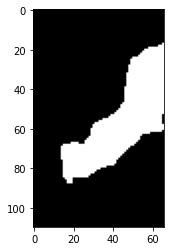

In [36]:
plt.imshow(srb.read(1), cmap='gray')
plt.show()

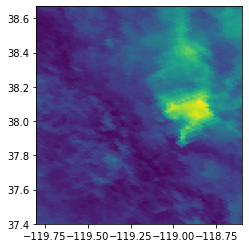

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


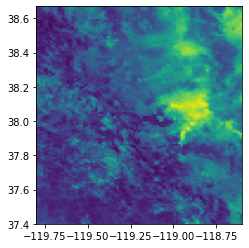

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


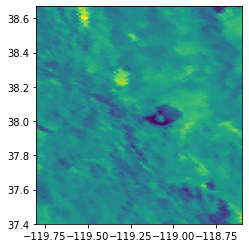

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


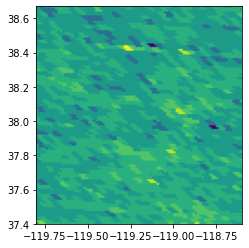

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


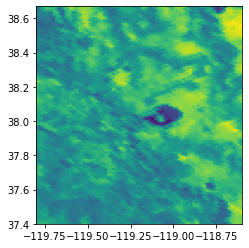

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


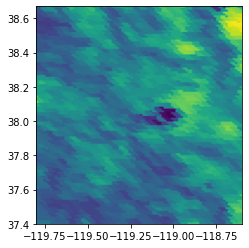

(<ColorInterp.gray: 1>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
<built-in method colormap of DatasetReader object at 0x7f013ec21a40>


In [91]:
srt = rasterio.open(tifpath + tiffol[1])
for _ in range(1,7):
  try:
    show(srt.read(_),transform=srt.transform)
    print(srt.colorinterp)
    print(srt.colormap)
  except IndexError:
    break

In [111]:
path = tifpath + '/' + tiffol[1]
with rasterio.open(path) as src:
    tifa = src.read()
#    tifa = tifa.reshape(46,52,6)
    meta = src.meta
    #Tagged Raster Image into N-Dimensional Array
    print("Matrix Representation of .tif image:\n")
    print(tifa,"\n\nDatatype:",tifa.dtype)

Matrix Representation of .tif image:

[[[57 57 59 ... 69 68 68]
  [56 57 59 ... 71 70 70]
  [56 56 57 ... 72 72 72]
  ...
  [61 60 60 ... 64 64 63]
  [61 61 61 ... 64 64 61]
  [62 61 62 ... 65 65 64]]

 [[38 40 45 ... 58 56 56]
  [37 38 40 ... 59 60 59]
  [36 39 38 ... 62 68 65]
  ...
  [40 41 40 ... 56 53 48]
  [48 42 41 ... 57 59 48]
  [42 43 45 ... 58 56 54]]

 [[56 56 63 ... 61 59 59]
  [61 56 63 ... 66 66 65]
  [59 59 55 ... 70 74 74]
  ...
  [70 73 71 ... 79 79 85]
  [74 76 76 ... 71 79 97]
  [69 75 75 ... 72 72 72]]

 [[ 7  7  5 ...  8  8  8]
  [ 7  7  5 ...  8  8  7]
  [ 7  7  7 ...  8  8  8]
  ...
  [ 7  7  8 ...  8  8  8]
  [10 10 10 ...  8  8  8]
  [ 7 10 10 ...  7  7  7]]

 [[43 43 54 ... 62 59 59]
  [35 43 54 ... 69 67 66]
  [41 41 43 ... 73 77 77]
  ...
  [51 51 49 ... 71 71 69]
  [59 57 57 ... 69 71 70]
  [53 57 58 ... 71 71 70]]

 [[31 31 43 ... 63 52 52]
  [31 31 43 ... 65 65 58]
  [31 31 31 ... 65 65 65]
  ...
  [35 35 35 ... 56 56 56]
  [39 39 39 ... 52 56 56]
  [39 

In [110]:
print("Matrix Representation of .bmp file\n")
bmpa = np.array(srb.read(1))
#Bitmap Image into N-Dimensional array
print(bmpa,"\n\nDatatype:",bmpa.dtype)

Matrix Representation of .bmp file

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Datatype: uint8


Text(0.5, 1.0, 'Frequency of colour band values in the rasters')

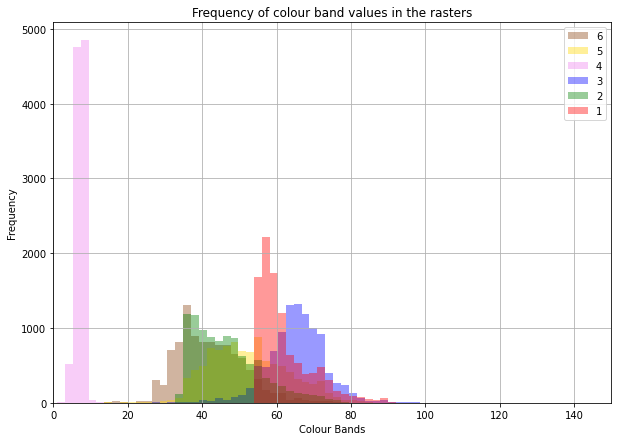

In [43]:
(axrgb, axhist) = plt.subplots(1, 1, figsize=(10,7))
show_hist(
    tifa, bins=50, lw=0.0, stacked=False, alpha=0.4,
    histtype='stepfilled', title="Histogram",ax=axhist)
plt.xlim(xmin=0, xmax = 150)
axhist.set_xlabel('Colour Bands')
axhist.set_title("Frequency of colour band values in the rasters")

In [114]:
print("Dimensions of .tif image:",tifa.shape)
print("\nMetadata:\n",meta)

Dimensions of .tif image: (6, 117, 87)

Metadata:
 {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 87, 'height': 117, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.013793103448275895, 0.0, -119.8,
       0.0, -0.010854700854700881, 38.67)}


In [45]:
print(bmpa.shape)

(110, 66)


In [94]:
Y = []
for path in bmpfol:
  imgy = cv2.imread(os.path.join(bmppath,path))
  Y.append(imgy)

In [95]:
X = []
for path in tiffol:
  with rasterio.open(os.path.join(tifpath,path)) as srt:
    imgy=srt.read()
  X.append(imgy)

In [96]:
for i in range(0,len(X)):
  print(X[i].shape)
  print(Y[i].shape,'\n')

(6, 110, 66)
(117, 87, 3) 

(6, 117, 87)
(110, 66, 3) 

(6, 161, 124)
(120, 169, 3) 

(6, 92, 68)
(305, 135, 3) 

(6, 386, 231)
(120, 126, 3) 

(6, 101, 99)
(101, 99, 3) 

(6, 120, 126)
(161, 124, 3) 

(6, 120, 169)
(386, 231, 3) 

(6, 305, 135)
(92, 68, 3) 

(6, 392, 299)
(392, 299, 3) 

(6, 147, 169)
(92, 94, 3) 

(6, 120, 121)
(120, 121, 3) 

(6, 92, 94)
(147, 169, 3) 

(6, 294, 89)
(294, 89, 3) 

(6, 170, 152)
(170, 152, 3) 

(6, 92, 74)
(92, 74, 3) 

(6, 266, 273)
(266, 273, 3) 

(6, 93, 109)
(93, 109, 3) 

(6, 110, 110)
(342, 167, 3) 

(6, 83, 45)
(83, 45, 3) 

(6, 342, 167)
(110, 110, 3) 

(6, 89, 99)
(342, 422, 3) 

(6, 303, 224)
(303, 224, 3) 

(6, 129, 109)
(129, 109, 3) 

(6, 153, 80)
(153, 80, 3) 

(6, 249, 152)
(89, 99, 3) 

(6, 342, 422)
(286, 251, 3) 

(6, 185, 213)
(249, 152, 3) 

(6, 286, 251)
(185, 213, 3) 

(6, 153, 145)
(277, 132, 3) 

(6, 111, 106)
(111, 106, 3) 

(6, 215, 122)
(215, 122, 3) 

(6, 64, 56)
(153, 145, 3) 

(6, 69, 89)
(69, 89, 3) 

(6, 277, 132)
(190

In [15]:
#just in case scaling function
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return image

# Ideas
Do we need to scale the images? Do we need to try a different model? Padding?? Change the Strides??


In [65]:
#U-Net Model
try:
    inputs = tf.keras.layers.Input((6, 512, 512))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
    #Contraction Path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansion Path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='softmax')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    ble = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(exc_type, ble,"\n\nFound at Line",exc_tb.tb_lineno)
    print("\n\n⚠ ⚠ ⚠ ⚠\n\n",traceback.format_exc(),"\n⚠ ⚠ ⚠ ⚠")

<class 'ValueError'> <ipython-input-65-d74279696fe7> 

Found at Line 19


⚠ ⚠ ⚠ ⚠

 Traceback (most recent call last):
  File "<ipython-input-65-d74279696fe7>", line 19, in <module>
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
  File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "max_pooling2d_44" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_44/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,128,64].

Call arguments received by layer "max_pooling2d_44" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 

In [66]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from keras.models import Model

# Input layer
inputs = Input((512, 512, 6))

# Encoder section
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Bottleneck
conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)

# Decoder section
up1 = UpSampling2D(size=(2, 2))(conv4)
merge1 = concatenate([conv3, up1], axis=-1)
conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge1)
up2 = UpSampling2D(size=(2, 2))(conv5)
merge2 = concatenate([conv2, up2], axis=-1)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge2)
up3 = UpSampling2D(size=(2, 2))(conv6)
merge3 = concatenate([conv1, up3], axis=-1)
conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge3)

# Output layer
outputs = Conv2D(3, (1, 1), activation='softmax')(conv7)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 512, 512, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 512, 512, 64  3520        ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_45 (MaxPooling2D  (None, 256, 256, 64  0          ['conv2d_94[0][0]']              
 )                              )                                                           

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
model.fit(xtrain,ytrain)
#Data Cardinality is Ambiguous